# IIC-3670 NLP UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- matplotlib 3.5.2
- nltk 3.7
- scipy 1.8.0
- networkx 2.8.3

In [1]:
import numpy, scipy, nltk, matplotlib
from nltk.corpus import gutenberg

print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [2]:
alice_words = gutenberg.words("carroll-alice.txt")

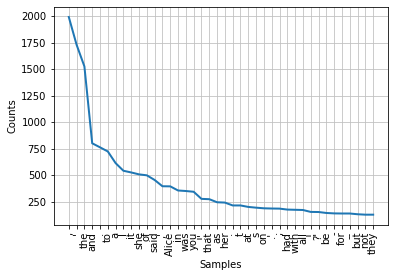

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [3]:
fdist1 = nltk.FreqDist(alice_words)
fdist1.plot(40)

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
# Load stop-words
stop_words = set(stopwords.words('english'))

# Initialize tokenizer
# It's also possible to try with a stemmer or to mix a stemmer and a lemmatizer
tokenizer = RegexpTokenizer('[\'a-zA-Z]+')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()


In [6]:
def tokenize(document):
    words = []

    for sentence in sent_tokenize(document):
        tokens = [lemmatizer.lemmatize(t.lower()) for t in tokenizer.tokenize(sentence) if t.lower() not in stop_words and len(t) > 2]
        words += tokens

    return words


In [7]:
document = gutenberg.raw("carroll-alice.txt")

In [8]:
words = tokenize(document)

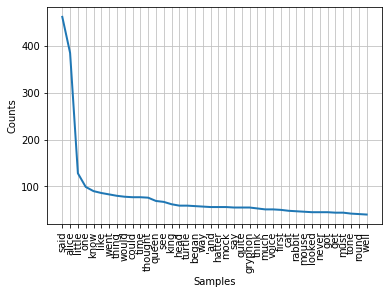

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
fdist1 = nltk.FreqDist(words)
fdist1.plot(40)

In [10]:
from nltk.corpus import wordnet as wn

wn.synsets('dog')

[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [11]:
print(wn.synset('dog.n.01').definition())
print(wn.synset('dog.n.01').lemmas())
print([str(lemma.name()) for lemma in wn.synset('dog.n.01').lemmas()])

a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
[Lemma('dog.n.01.dog'), Lemma('dog.n.01.domestic_dog'), Lemma('dog.n.01.Canis_familiaris')]
['dog', 'domestic_dog', 'Canis_familiaris']


In [12]:
dog = wn.synset('dog.n.01')
print(dog.hypernyms())
print(dog.hyponyms())

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
[Synset('basenji.n.01'), Synset('corgi.n.01'), Synset('cur.n.01'), Synset('dalmatian.n.02'), Synset('great_pyrenees.n.01'), Synset('griffon.n.02'), Synset('hunting_dog.n.01'), Synset('lapdog.n.01'), Synset('leonberg.n.01'), Synset('mexican_hairless.n.01'), Synset('newfoundland.n.01'), Synset('pooch.n.01'), Synset('poodle.n.01'), Synset('pug.n.01'), Synset('puppy.n.01'), Synset('spitz.n.01'), Synset('toy_dog.n.01'), Synset('working_dog.n.01')]


In [13]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [14]:
car = wn.synset('car.n.01')
print(car.hypernyms())
print(car.hyponyms())

[Synset('motor_vehicle.n.01')]
[Synset('ambulance.n.01'), Synset('beach_wagon.n.01'), Synset('bus.n.04'), Synset('cab.n.03'), Synset('compact.n.03'), Synset('convertible.n.01'), Synset('coupe.n.01'), Synset('cruiser.n.01'), Synset('electric.n.01'), Synset('gas_guzzler.n.01'), Synset('hardtop.n.01'), Synset('hatchback.n.01'), Synset('horseless_carriage.n.01'), Synset('hot_rod.n.01'), Synset('jeep.n.01'), Synset('limousine.n.01'), Synset('loaner.n.02'), Synset('minicar.n.01'), Synset('minivan.n.01'), Synset('model_t.n.01'), Synset('pace_car.n.01'), Synset('racer.n.02'), Synset('roadster.n.01'), Synset('sedan.n.01'), Synset('sport_utility.n.01'), Synset('sports_car.n.01'), Synset('stanley_steamer.n.01'), Synset('stock_car.n.01'), Synset('subcompact.n.01'), Synset('touring_car.n.01'), Synset('used-car.n.01')]


In [15]:
dog = wn.synset('dog.n.01')
cat = wn.synset('cat.n.01')
monkey = wn.synset('monkey.n.01')
human = wn.synset('human.n.01')

In [16]:
import networkx as nx

def closure_graph(synset, fn, lang):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.lemma_names(lang=lang)[0])
            for s1 in fn(s):
                graph.add_node(s1.lemma_names(lang=lang)[0])
                graph.add_edge(s.lemma_names(lang=lang)[0], s1.lemma_names(lang=lang)[0])
                recurse(s1)

    recurse(synset)
    return graph

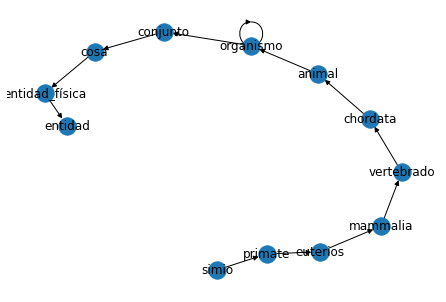

In [17]:
import matplotlib.pyplot as plt

graph = closure_graph(monkey, lambda s: s.hypernyms(), 'spa')
nx.draw(graph, with_labels=True)
plt.draw()

In [18]:
print(monkey.path_similarity(human))
print(dog.path_similarity(human))

0.25
0.14285714285714285
